In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import data via csv

In [7]:
df = pd.read_csv('psl.csv')

In [8]:
df.head()

,match_id,season,start_date,venue,innings,ball,Balls,batting_team,bowling_team,striker,...,other_wicket_type,other_player_dismissed,over,over_band,wicket_band,run_band,Econ,MATCH,Total,Wicket
0,1075986,2016/17,09/02/2017,Dubai International Cricket Stadium,1,0.1,1,Peshawar Zalmi,Islamabad United,Mohammad Hafeez,...,NaN,NaN,1,01-Mar,01-Feb,Less than 25,0.0,1075986-1,190,9
1,1075986,2016/17,09/02/2017,Dubai International Cricket Stadium,1,0.2,2,Peshawar Zalmi,Islamabad United,Kamran Akmal,...,NaN,NaN,1,01-Mar,01-Feb,Less than 25,3.0,1075986-1,190,9
2,1075986,2016/17,09/02/2017,Dubai International Cricket Stadium,1,0.3,3,Peshawar Zalmi,Islamabad United,DJ Malan,...,NaN,NaN,1,01-Mar,01-Feb,Less than 25,2.0,1075986-1,190,9
3,1075986,2016/17,09/02/2017,Dubai International Cricket Stadium,1,0.4,4,Peshawar Zalmi,Islamabad United,DJ Malan,...,NaN,NaN,1,01-Mar,01-Feb,Less than 25,1.5,1075986-1,190,9
4,1075986,2016/17,09/02/2017,Dubai International Cricket Stadium,1,0.5,5,Peshawar Zalmi,Islamabad United,DJ Malan,...,NaN,NaN,1,01-Mar,01-Feb,Less than 25,1.2,1075986-1,190,9


In [9]:
# Add total runs and wickets in last 5 overs
df['last_5_runs'] = df.total_1.rolling(window = 30).sum().shift()
df['last_5_wicket'] = df.wicket_1.rolling(window = 30).sum().shift()

In [10]:
## Rows and columns
df.shape

(37111, 37)

In [11]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball', 'Balls',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'total_1', 'wicket_1', 'total_run',
       'total_wicket', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'over', 'over_band', 'wicket_band',
       'run_band', 'Econ', 'MATCH', 'Total ', 'Wicket', 'last_5_runs',
       'last_5_wicket'],
      dtype='object')

## Removing Data

In [17]:
# removing Irrelevant columns
data = df[['innings', 'venue',
       'batting_team', 'bowling_team',
         'total_run',
       'total_wicket', 'over', 'Total ','last_5_runs','last_5_wicket']]

In [18]:
df.groupby(['innings'])['match_id'].nunique()

innings
1    160
2    158
3      3
4      3
Name: match_id, dtype: int64

In [19]:
# There were 3 PSL matches involving Super Over.I'm going to remove these innings from dataset since these are abnormal.
# I'm going to predict the final score for First Innings. 
data = data[data['innings']==1]

In [20]:
data.shape

(19273, 10)

In [21]:
data.head()

,innings,venue,batting_team,bowling_team,total_run,total_wicket,over,Total,last_5_runs,last_5_wicket
0,1,Dubai International Cricket Stadium,Peshawar Zalmi,Islamabad United,0,1,1,190,NaN,NaN
1,1,Dubai International Cricket Stadium,Peshawar Zalmi,Islamabad United,1,1,1,190,NaN,NaN
2,1,Dubai International Cricket Stadium,Peshawar Zalmi,Islamabad United,1,1,1,190,NaN,NaN
3,1,Dubai International Cricket Stadium,Peshawar Zalmi,Islamabad United,1,1,1,190,NaN,NaN
4,1,Dubai International Cricket Stadium,Peshawar Zalmi,Islamabad United,1,1,1,190,NaN,NaN


In [22]:
data = data[data['over']>5.0]

In [23]:
data.shape

(14340, 10)

##  get Dummies

In [24]:
#Categorical Columns
cat = data[[ 'batting_team',
       'bowling_team','venue']]

In [25]:
#Dummy variables 
dummie = pd.get_dummies(cat)

In [26]:
#Concating the two DataFrames
dt = pd.concat([data,dummie],axis=1)

In [28]:
dt = dt.drop(['batting_team','innings',
       'bowling_team','venue'],axis=1)

In [29]:
dt.describe()

,total_run,total_wicket,over,Total,last_5_runs,last_5_wicket,batting_team_Islamabad United,batting_team_Karachi Kings,batting_team_Lahore Qalandars,batting_team_Multan Sultans,...,bowling_team_Multan Sultans,bowling_team_Peshawar Zalmi,bowling_team_Quetta Gladiators,venue_Dubai International Cricket Stadium,venue_Gaddafi Stadium,venue_Multan Cricket Stadium,venue_National Stadium,venue_Rawalpindi Cricket Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium
count,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,...,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000
mean,94.204393,3.301883,12.893166,156.863250,38.452859,1.459554,0.173780,0.180893,0.185216,0.134798,...,0.081939,0.191213,0.221618,0.376639,0.081032,0.018968,0.225662,0.035146,0.236332,0.026220
std,39.745319,2.021782,4.294484,28.694931,11.507191,1.125054,0.378933,0.384943,0.388486,0.341519,...,0.274281,0.393270,0.415350,0.484560,0.272894,0.136416,0.418032,0.184156,0.424843,0.159796
min,14.000000,0.000000,6.000000,59.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,2.000000,9.000000,136.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,3.000000,13.000000,156.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,122.000000,4.000000,17.000000,181.000000,46.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,238.000000,10.000000,20.000000,238.000000,88.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model

In [30]:
X = dt.drop('Total ',axis=1)
y = dt['Total ']

# Feature selection

I'm going to carry out feature selection to choose the variables that will help to build the best possible model.

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
features = pd.Series(model.feature_importances_,index=X.columns)
features.nlargest(20)

total_run                                    0.199507
total_wicket                                 0.177176
last_5_runs                                  0.154067
last_5_wicket                                0.038116
over                                         0.035398
venue_National Stadium                       0.032409
batting_team_Lahore Qalandars                0.031978
bowling_team_Lahore Qalandars                0.027849
batting_team_Peshawar Zalmi                  0.027753
bowling_team_Karachi Kings                   0.026833
bowling_team_Peshawar Zalmi                  0.025612
batting_team_Islamabad United                0.025539
venue_Dubai International Cricket Stadium    0.024208
venue_Gaddafi Stadium                        0.023287
bowling_team_Quetta Gladiators               0.022886
venue_Sharjah Cricket Stadium                0.021203
batting_team_Quetta Gladiators               0.018145
bowling_team_Multan Sultans                  0.017913
batting_team_Multan Sultans 

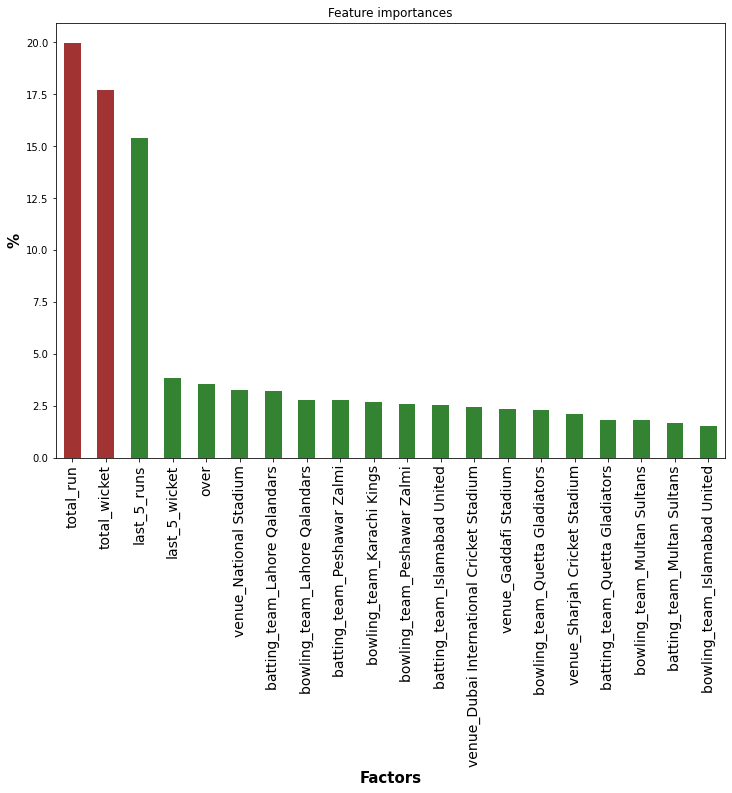

In [33]:
barplot = features.mul(100).nlargest(20)
colormat= ['darkred','darkred','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
           ,'darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
           ,'darkgreen','darkgreen','darkgreen','darkgreen'  ]

barplot.plot(kind='bar',title='Feature importances', color = colormat, alpha = 0.8,figsize=(12,8))
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('%', fontsize = 15, weight = 'bold')
plt.tick_params(axis='x', which='major', labelsize=14)
plt.show()

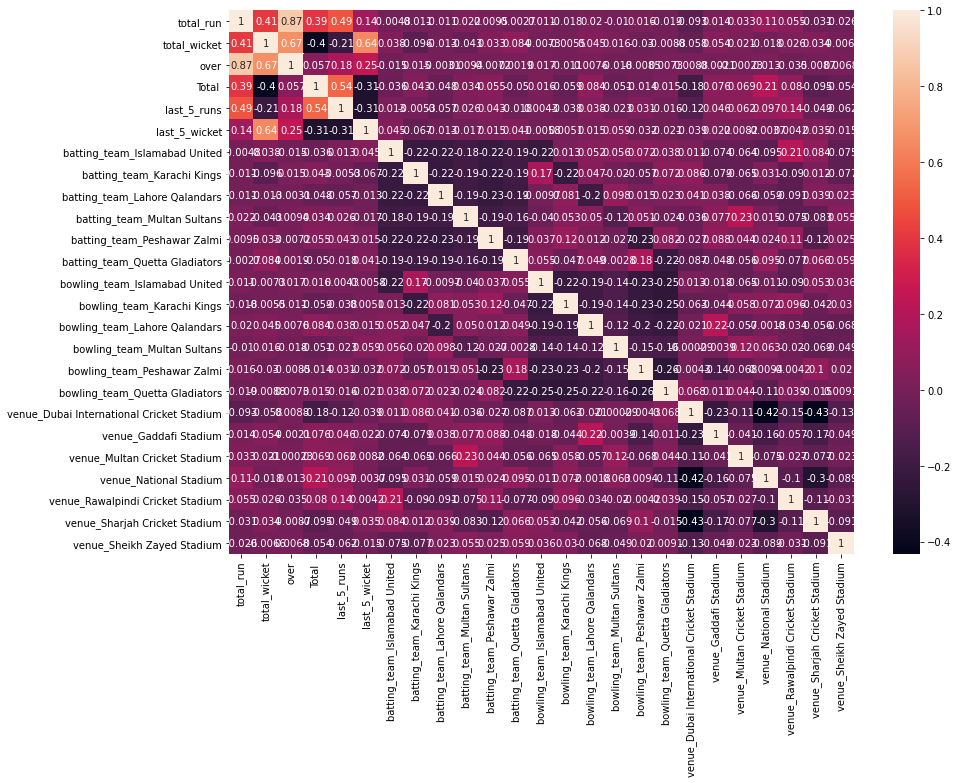

In [34]:
Corr = dt.corr()
plt.figure(figsize=(14,10))
sns.heatmap(Corr, annot = True)
plt.show()

In [35]:
# import all the libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)


In [37]:
lin = LinearRegression()
lin.fit(X_train,y_train)

lin_pred = lin.predict(X_test)

np.mean(cross_val_score(lin,X_train,y_train,scoring='neg_mean_absolute_error'))
print('mae for Linear Regression :',mean_absolute_error(y_test,lin_pred))
print('mse for Linear Regression :',mean_squared_error(y_test, lin_pred))
print('Rmse for Linear Regression :',np.sqrt(mean_squared_error(y_test, lin_pred)))
print('r2 score for Linear Regression :', r2_score(y_test,lin_pred))

mae for Linear Regression : 13.694512186753316
mse for Linear Regression : 319.5287363351776
Rmse for Linear Regression : 17.87536674687201
r2 score for Linear Regression : 0.6182119526563904


In [38]:
#Lasso
lm_1 = Lasso()
lm_1.fit(X_train,y_train)

#prediction
lm_1_pred = lm_1.predict(X_test)

np.mean(cross_val_score(lm_1,X_train,y_train,scoring='neg_mean_absolute_error'))
print('mae for Lasso :',mean_absolute_error(y_test,lm_1_pred))
print('mse for Lasso :',mean_squared_error(y_test, lm_1_pred))
print('Rmse for Lasso :',np.sqrt(mean_squared_error(y_test, lm_1_pred)))
print('r2 score for Lasso :', r2_score(y_test,lm_1_pred))

mae for Lasso : 14.131431111589675
mse for Lasso : 353.53078244962285
Rmse for Lasso : 18.802414271832827
r2 score for Lasso : 0.577584699719415


In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

#prediction
tree_prd = tree.predict(X_test)


np.mean(cross_val_score(tree,X_train,y_train,scoring='neg_mean_absolute_error'))

print('mae for tree :',mean_absolute_error(y_test,tree_prd))
print('mse for tree :',mean_squared_error(y_test, tree_prd))
print('Rmse for tree :',np.sqrt(mean_squared_error(y_test, tree_prd)))
print('r2 score for tree :', r2_score(y_test,tree_prd))

mae for tree : 2.30145447300259
mse for tree : 78.69794779836622
Rmse for tree : 8.87118638054495
r2 score for tree : 0.9059679696903062


In [40]:
#KNeighbour 
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor()
Knn.fit(X_train,y_train)

#prediction
Knn_pred = Knn.predict(X_test)

np.mean(cross_val_score(Knn,X_train,y_train,scoring='neg_mean_absolute_error'))

print('mae for KNeighbour :',mean_absolute_error(y_test,Knn_pred))
print('mse for KNeighbour :',mean_squared_error(y_test, Knn_pred))
print('Rmse for KNeighbour :',np.sqrt(mean_squared_error(y_test, Knn_pred)))
print('r2 score for KNeighbour :', r2_score(y_test,Knn_pred))

mae for KNeighbour : 10.437457660888622
mse for KNeighbour : 234.08352261406654
Rmse for KNeighbour : 15.299788319256791
r2 score for KNeighbour : 0.7203059354248784


In [41]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()
rg.fit(X_train,y_train)

#prediction
rg_pred = rg.predict(X_test)

np.mean(cross_val_score(rg,X_train,y_train,scoring='neg_mean_absolute_error'))


print('mae for RandomForestRegressor :',mean_absolute_error(y_test,rg_pred))
print('mse for RandomForestRegressor :',mean_squared_error(y_test, rg_pred))
print('Rmse for RandomForestRegressor :',np.sqrt(mean_squared_error(y_test, rg_pred)))
print('r2 score for RandomForestRegressor :', r2_score(y_test,rg_pred))

mae for RandomForestRegressor : 2.818165902902305
mse for RandomForestRegressor : 30.582680788824693
Rmse for RandomForestRegressor : 5.5301610093038605
r2 score for RandomForestRegressor : 0.9634583664842891


In [42]:
import pickle
pickl = {'model': rg}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [43]:
import pickle
import gzip
pickl = {'model': rg}

def save_zipped_pickle(pickl, filename, protocol=-1):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(pickl, f, protocol)

In [44]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [60]:
model.predict(np.array(list(z)).reshape(1,-1))[0]

129.78

In [171]:
X_test.iloc[29,:].values

array([68., 78.,  3., 12., 32.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [59]:
z = [
 79.0,
3.0,
13.1,
59.0,
 3.0,
 1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,
        0.0,  0.0,  0.0,  1.0,  0.0,  1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0]

In [61]:
X_test.columns

Index(['total_run', 'total_wicket', 'over', 'last_5_runs', 'last_5_wicket',
       'batting_team_Islamabad United', 'batting_team_Karachi Kings',
       'batting_team_Lahore Qalandars', 'batting_team_Multan Sultans',
       'batting_team_Peshawar Zalmi', 'batting_team_Quetta Gladiators',
       'bowling_team_Islamabad United', 'bowling_team_Karachi Kings',
       'bowling_team_Lahore Qalandars', 'bowling_team_Multan Sultans',
       'bowling_team_Peshawar Zalmi', 'bowling_team_Quetta Gladiators',
       'venue_Dubai International Cricket Stadium', 'venue_Gaddafi Stadium',
       'venue_Multan Cricket Stadium', 'venue_National Stadium',
       'venue_Rawalpindi Cricket Stadium', 'venue_Sharjah Cricket Stadium',
       'venue_Sheikh Zayed Stadium'],
      dtype='object')